# Data Understanding

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


In [4]:
data=pd.read_csv("Borrower_Payment_History.csv")
print(data.shape)
print(list(data.columns))


(6000, 21)
['subject_id', 'account_id', 'DATE_REPORTED', 'currency_code', 'REPAYMENT_FREQUENCY', 'NUMBER_OF_INSTALLMENTS', 'SANCTION_AMT', 'TOT_OUTSTD_BAL', 'OVER_DUE_AMT', 'AMOUNT_OF_INSTALLMENT', 'DATE_LATEST_PAY_RECEIVED', 'LAST_AMOUNT_PAID', 'DATE_ACC_OPEN', 'DATE_ACC_CLOSE', 'INSTALMENT_LOAN_TYPE', 'loan_status', 'ASSET_CLASSIFICATION', 'REASON_FOR_CLOSURE', 'NO_OF_DAYS_PAST_DUE', 'LOAN_TENURE', 'EXPECTED_END_DATE_OF_LOAN']


In [5]:
data.head()

,subject_id,account_id,DATE_REPORTED,currency_code,REPAYMENT_FREQUENCY,NUMBER_OF_INSTALLMENTS,SANCTION_AMT,TOT_OUTSTD_BAL,OVER_DUE_AMT,AMOUNT_OF_INSTALLMENT,...,LAST_AMOUNT_PAID,DATE_ACC_OPEN,DATE_ACC_CLOSE,INSTALMENT_LOAN_TYPE,loan_status,ASSET_CLASSIFICATION,REASON_FOR_CLOSURE,NO_OF_DAYS_PAST_DUE,LOAN_TENURE,EXPECTED_END_DATE_OF_LOAN
0,110113010000498773,2201160002396407,02-JAN-18,TZS,MonthlyInstalments30Days,6.0,400000.0,0.00,205609.4,0.00,...,NaN,29-JUN-16,29-DEC-16,OtherInstalmentOperation,Existing,NaN,NaN,399.0,NaN,29-DEC-16
1,110115010001596750,2201170002990772,08-JAN-18,TZS,MonthlyInstalments30Days,61.0,3500000.0,3272849.49,0.0,100243.11,...,NaN,29-JUN-17,05-JUL-22,ConsumerLoan,Existing,NaN,NaN,0.0,NaN,05-JUL-22
2,110114010000832340,2201140001177207,02-JAN-18,TZS,MonthlyInstalments30Days,57.0,4200000.0,870462.93,0.0,106652.40,...,NaN,27-DEC-13,NaN,ConsumerLoan,Existing,NaN,NaN,0.0,NaN,27-SEP-18
3,110114010000740514,2201160002371670,02-JAN-18,TZS,MonthlyInstalments30Days,24.0,60000000.0,15740676.93,0.0,2987342.81,...,NaN,11-MAY-16,NaN,BusinessLoan,Existing,NaN,NaN,18.0,NaN,11-MAY-18
4,110114010000811717,2201140001161294,08-JAN-18,TZS,MonthlyInstalments30Days,69.0,3400000.0,828981.51,0.0,99164.00,...,NaN,20-FEB-13,16-NOV-18,ConsumerLoan,Existing,NaN,NaN,0.0,NaN,16-NOV-18


In [6]:
data.drop(['LAST_AMOUNT_PAID','ASSET_CLASSIFICATION','REASON_FOR_CLOSURE','LOAN_TENURE'], inplace=True, axis=1)


data.head()

,subject_id,account_id,DATE_REPORTED,currency_code,REPAYMENT_FREQUENCY,NUMBER_OF_INSTALLMENTS,SANCTION_AMT,TOT_OUTSTD_BAL,OVER_DUE_AMT,AMOUNT_OF_INSTALLMENT,DATE_LATEST_PAY_RECEIVED,DATE_ACC_OPEN,DATE_ACC_CLOSE,INSTALMENT_LOAN_TYPE,loan_status,NO_OF_DAYS_PAST_DUE,EXPECTED_END_DATE_OF_LOAN
0,110113010000498773,2201160002396407,02-JAN-18,TZS,MonthlyInstalments30Days,6.0,400000.0,0.00,205609.4,0.00,29-NOV-16,29-JUN-16,29-DEC-16,OtherInstalmentOperation,Existing,399.0,29-DEC-16
1,110115010001596750,2201170002990772,08-JAN-18,TZS,MonthlyInstalments30Days,61.0,3500000.0,3272849.49,0.0,100243.11,29-DEC-17,29-JUN-17,05-JUL-22,ConsumerLoan,Existing,0.0,05-JUL-22
2,110114010000832340,2201140001177207,02-JAN-18,TZS,MonthlyInstalments30Days,57.0,4200000.0,870462.93,0.0,106652.40,28-DEC-17,27-DEC-13,NaN,ConsumerLoan,Existing,0.0,27-SEP-18
3,110114010000740514,2201160002371670,02-JAN-18,TZS,MonthlyInstalments30Days,24.0,60000000.0,15740676.93,0.0,2987342.81,18-DEC-17,11-MAY-16,NaN,BusinessLoan,Existing,18.0,11-MAY-18
4,110114010000811717,2201140001161294,08-JAN-18,TZS,MonthlyInstalments30Days,69.0,3400000.0,828981.51,0.0,99164.00,29-DEC-17,20-FEB-13,16-NOV-18,ConsumerLoan,Existing,0.0,16-NOV-18


In [7]:
data.shape

(6000, 17)

In [8]:
data['DEFAULT'] = data['NO_OF_DAYS_PAST_DUE'].apply(lambda x: 1 if x>=90 else 0)
data[['DEFAULT']] = data[['DEFAULT']].apply(pd.to_numeric)

In [9]:
data['REPAYMENT_FREQUENCY'].unique()

array(['MonthlyInstalments30Days', 'AtTheFinalDayOfThePeriodOfContract',
       'IrregularInstalments', nan, 'AnnualInstalments360Days',
       'SixMonthInstalments180Days', 'FortnightlyInstalments15Days'],
      dtype=object)

In [10]:
data['loan_status'].unique() 

array(['Existing', 'TerminatedAccordingTheContract',
       'TerminatedInAdvanceCorrectly', 'TerminatedInAdvanceIncorrectly'],
      dtype=object)

In [11]:
data['INSTALMENT_LOAN_TYPE'].unique() 

array(['OtherInstalmentOperation', 'ConsumerLoan', 'BusinessLoan',
       'CreditCard', 'LeasingFinancial', 'MortgageLoan', nan, 'Overdraft',
       'LineOfCreditOnCurrentAccount'], dtype=object)

In [593]:
data['DEFAULT'].value_counts()

0    5705
1     295
Name: DEFAULT, dtype: int64

In [594]:
data['NUMBER_OF_INSTALLMENTS'].loc[data['DEFAULT'] == 0].describe()

count    5632.000000
mean       37.761009
std        27.303930
min         0.000000
25%         6.000000
50%        48.000000
75%        60.000000
max       246.000000
Name: NUMBER_OF_INSTALLMENTS, dtype: float64

In [595]:
data['NUMBER_OF_INSTALLMENTS'].loc[data['DEFAULT'] == 1].describe()

count    289.00000
mean      24.83737
std       21.11093
min        1.00000
25%        8.00000
50%       12.00000
75%       41.00000
max       73.00000
Name: NUMBER_OF_INSTALLMENTS, dtype: float64

In [596]:
data['SANCTION_AMT'].loc[data['DEFAULT'] == 0].describe()

count    5.705000e+03
mean     8.096634e+06
std      1.544146e+07
min      0.000000e+00
25%      1.000000e+06
50%      4.551767e+06
75%      9.500000e+06
max      4.000000e+08
Name: SANCTION_AMT, dtype: float64

In [597]:
data['SANCTION_AMT'].loc[data['DEFAULT'] == 1].describe()

count    2.950000e+02
mean     6.885276e+06
std      1.279320e+07
min      0.000000e+00
25%      8.989621e+05
50%      2.500000e+06
75%      7.000000e+06
max      1.032456e+08
Name: SANCTION_AMT, dtype: float64

In [598]:
data['AMOUNT_OF_INSTALLMENT'].loc[data['DEFAULT'] == 0].describe()

count    5.682000e+03
mean     2.969255e+05
std      8.253339e+05
min      0.000000e+00
25%      8.454731e+04
50%      1.616179e+05
75%      2.853461e+05
max      2.500000e+07
Name: AMOUNT_OF_INSTALLMENT, dtype: float64

In [599]:
data['AMOUNT_OF_INSTALLMENT'].loc[data['DEFAULT'] == 1].describe()

count    2.900000e+02
mean     3.041467e+05
std      6.208406e+05
min      0.000000e+00
25%      6.836392e+04
50%      1.467627e+05
75%      3.189894e+05
max      8.469583e+06
Name: AMOUNT_OF_INSTALLMENT, dtype: float64

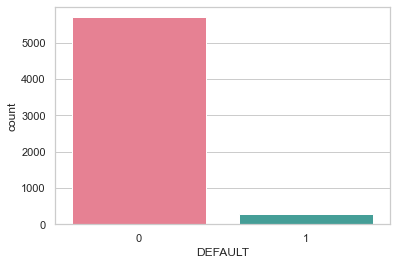

In [600]:
sns.countplot(x='DEFAULT', data=data,palette='husl')
plt.show()

In [601]:
count_no_sub = len(data[data['DEFAULT']==0])
count_sub = len(data[data['DEFAULT']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no default is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of default", pct_of_sub*100)

percentage of no default is 95.08333333333333
percentage of default 4.916666666666666


In [602]:
data.groupby('DEFAULT').mean()

,subject_id,account_id,NUMBER_OF_INSTALLMENTS,SANCTION_AMT,TOT_OUTSTD_BAL,OVER_DUE_AMT,AMOUNT_OF_INSTALLMENT,NO_OF_DAYS_PAST_DUE
DEFAULT,,,,,,,,
0,1.101153e+17,2.201167e+15,37.761009,8.096634e+06,6.017291e+06,6.968854e+04,296925.494220,1.790912
1,1.101155e+17,2.201160e+15,24.837370,6.885276e+06,3.635536e+06,2.705242e+06,304146.656621,359.196610


In [603]:
#group by repayment frequency
data.groupby('REPAYMENT_FREQUENCY').mean()

,subject_id,account_id,NUMBER_OF_INSTALLMENTS,SANCTION_AMT,TOT_OUTSTD_BAL,OVER_DUE_AMT,AMOUNT_OF_INSTALLMENT,NO_OF_DAYS_PAST_DUE,DEFAULT
REPAYMENT_FREQUENCY,,,,,,,,,
AnnualInstalments360Days,1.101150e+17,2.201150e+15,15.000000,4.301574e+07,4.114155e+07,1.184819e+06,1.184819e+06,152.000000,1.000000
AtTheFinalDayOfThePeriodOfContract,1.101154e+17,2.201179e+15,0.989848,8.937313e+05,8.801135e+05,4.332906e+04,7.038967e+05,22.420513,0.096447
FortnightlyInstalments15Days,1.101175e+17,2.201148e+15,32.960000,7.220000e+05,1.821560e+05,4.607376e+04,2.273200e+04,117.280000,0.280000
IrregularInstalments,1.101162e+17,2.201175e+15,54.475000,8.122500e+06,4.989189e+06,3.069175e+05,4.088063e+04,41.250000,0.050000
MonthlyInstalments30Days,1.101153e+17,2.201166e+15,38.289730,8.197143e+06,6.091780e+06,1.617297e+05,2.845551e+05,18.694282,0.045820
SixMonthInstalments180Days,1.101130e+17,2.201130e+15,30.000000,1.170000e+08,5.097436e+07,3.185897e+06,9.036615e+06,49.000000,0.000000


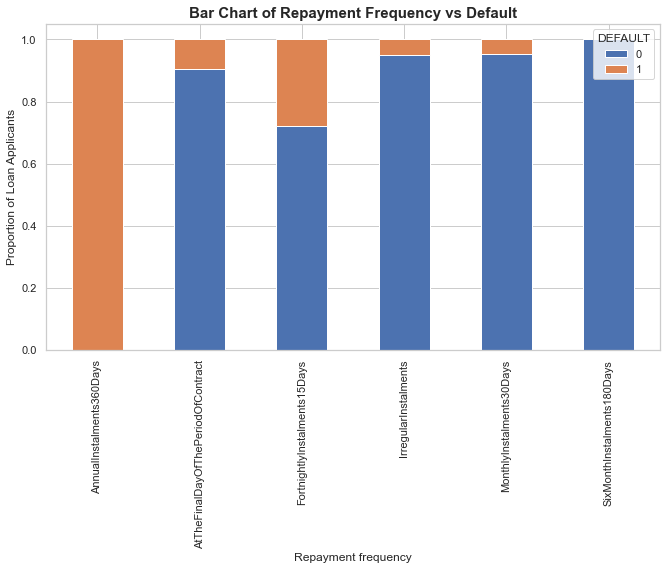

In [604]:
table=pd.crosstab(data.REPAYMENT_FREQUENCY,data.DEFAULT)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(11, 6))
plt.title('Bar Chart of Repayment Frequency vs Default',fontsize=15,fontweight="bold")
plt.xlabel('Repayment frequency') 
plt.ylabel('Proportion of Loan Applicants')
plt.savefig('Repayment frequency vs Default')

In [605]:
data.groupby('INSTALMENT_LOAN_TYPE').mean()

,subject_id,account_id,NUMBER_OF_INSTALLMENTS,SANCTION_AMT,TOT_OUTSTD_BAL,OVER_DUE_AMT,AMOUNT_OF_INSTALLMENT,NO_OF_DAYS_PAST_DUE,DEFAULT
INSTALMENT_LOAN_TYPE,,,,,,,,,
BusinessLoan,1.101162e+17,2.201172e+15,11.638576,4.782396e+06,2.848175e+06,1.749099e+05,3.410191e+05,38.535211,0.096736
ConsumerLoan,1.101149e+17,2.201164e+15,48.254193,9.298309e+06,7.386720e+06,1.539839e+05,2.732218e+05,11.096341,0.029350
CreditCard,1.101154e+17,2.201162e+15,NaN,7.010246e+06,2.019714e+06,2.881626e+04,7.010246e+05,3.442623,0.032787
LeasingFinancial,1.101176e+17,2.201175e+15,36.000000,4.658509e+07,4.404942e+07,9.461612e+05,1.425881e+06,17.818182,0.090909
LineOfCreditOnCurrentAccount,1.101160e+17,2.201176e+15,NaN,0.000000e+00,NaN,2.812000e+02,NaN,43.200000,0.200000
MortgageLoan,1.101138e+17,2.201138e+15,126.687500,9.133156e+07,5.784015e+07,1.667105e+06,1.750501e+06,27.933333,0.062500
OtherInstalmentOperation,1.101158e+17,2.201169e+15,32.533546,4.802376e+06,2.261334e+06,2.687871e+04,1.943498e+05,10.546326,0.009585
Overdraft,1.101139e+17,2.201177e+15,NaN,5.170437e+07,NaN,1.885821e+07,NaN,82.923077,0.230769


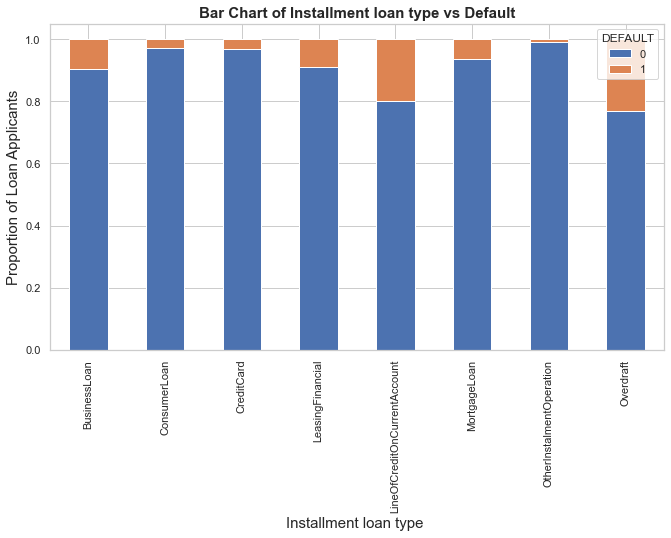

In [606]:
table=pd.crosstab(data.INSTALMENT_LOAN_TYPE,data.DEFAULT)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(11, 6))
plt.title('Bar Chart of Installment loan type vs Default',fontsize=15,fontweight="bold")
plt.xlabel('Installment loan type ',fontsize=15)
plt.ylabel('Proportion of Loan Applicants',fontsize=15)
plt.savefig('Installment loan type vs Default')

In [607]:
data.groupby('loan_status').mean()

,subject_id,account_id,NUMBER_OF_INSTALLMENTS,SANCTION_AMT,TOT_OUTSTD_BAL,OVER_DUE_AMT,AMOUNT_OF_INSTALLMENT,NO_OF_DAYS_PAST_DUE,DEFAULT
loan_status,,,,,,,,,
Existing,1.101154e+17,2.201167e+15,42.230169,9.129618e+06,7.161719e+06,240946.737360,314986.310730,23.476816,0.058847
TerminatedAccordingTheContract,1.101153e+17,2.201163e+15,14.836151,3.171736e+06,0.000000e+00,0.000000,236672.765189,0.000000,0.000000
TerminatedInAdvanceCorrectly,1.101151e+17,2.201173e+15,9.627240,2.058451e+06,0.000000e+00,0.000000,147680.645376,0.000000,0.000000
TerminatedInAdvanceIncorrectly,1.101156e+17,2.201157e+15,37.285714,9.017143e+06,2.528324e+06,693539.367143,477320.318571,232.428571,0.571429


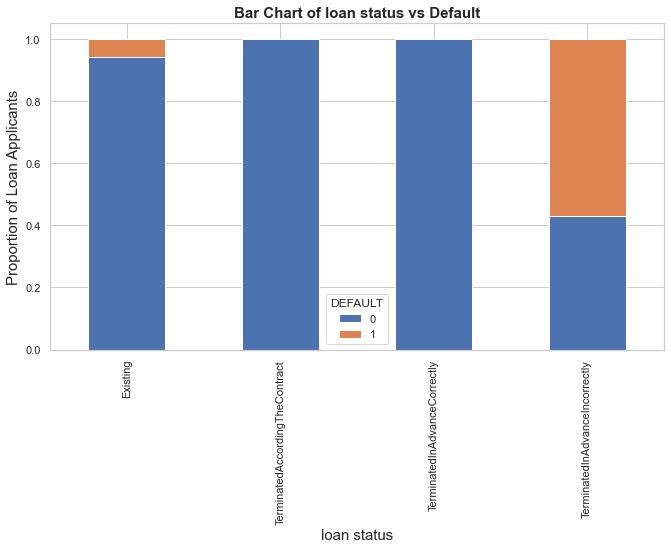

In [608]:
table=pd.crosstab(data.loan_status,data.DEFAULT)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(11, 6))
plt.title('Bar Chart of loan status vs Default',fontsize=15,fontweight="bold")
plt.xlabel('loan status',fontsize=15)
plt.ylabel('Proportion of Loan Applicants',fontsize=15)
plt.savefig('loan status vs Default')

# Data Preparation

# create dummy variables

In [609]:
#create dummy variables

categorical_variables=['REPAYMENT_FREQUENCY','INSTALMENT_LOAN_TYPE','loan_status']
for var in categorical_variables:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
    
categorical_variables=['REPAYMENT_FREQUENCY','INSTALMENT_LOAN_TYPE','loan_status']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in categorical_variables]
data_final=data[to_keep]
data_final.columns.values

array(['subject_id', 'account_id', 'DATE_REPORTED', 'currency_code',
       'NUMBER_OF_INSTALLMENTS', 'SANCTION_AMT', 'TOT_OUTSTD_BAL',
       'OVER_DUE_AMT', 'AMOUNT_OF_INSTALLMENT',
       'DATE_LATEST_PAY_RECEIVED', 'DATE_ACC_OPEN', 'DATE_ACC_CLOSE',
       'NO_OF_DAYS_PAST_DUE', 'EXPECTED_END_DATE_OF_LOAN', 'DEFAULT',
       'REPAYMENT_FREQUENCY_AnnualInstalments360Days',
       'REPAYMENT_FREQUENCY_AtTheFinalDayOfThePeriodOfContract',
       'REPAYMENT_FREQUENCY_FortnightlyInstalments15Days',
       'REPAYMENT_FREQUENCY_IrregularInstalments',
       'REPAYMENT_FREQUENCY_MonthlyInstalments30Days',
       'REPAYMENT_FREQUENCY_SixMonthInstalments180Days',
       'INSTALMENT_LOAN_TYPE_BusinessLoan',
       'INSTALMENT_LOAN_TYPE_ConsumerLoan',
       'INSTALMENT_LOAN_TYPE_CreditCard',
       'INSTALMENT_LOAN_TYPE_LeasingFinancial',
       'INSTALMENT_LOAN_TYPE_LineOfCreditOnCurrentAccount',
       'INSTALMENT_LOAN_TYPE_MortgageLoan',
       'INSTALMENT_LOAN_TYPE_OtherInstalmentOperatio

In [610]:
data_final.head()

,subject_id,account_id,DATE_REPORTED,currency_code,NUMBER_OF_INSTALLMENTS,SANCTION_AMT,TOT_OUTSTD_BAL,OVER_DUE_AMT,AMOUNT_OF_INSTALLMENT,DATE_LATEST_PAY_RECEIVED,...,INSTALMENT_LOAN_TYPE_CreditCard,INSTALMENT_LOAN_TYPE_LeasingFinancial,INSTALMENT_LOAN_TYPE_LineOfCreditOnCurrentAccount,INSTALMENT_LOAN_TYPE_MortgageLoan,INSTALMENT_LOAN_TYPE_OtherInstalmentOperation,INSTALMENT_LOAN_TYPE_Overdraft,loan_status_Existing,loan_status_TerminatedAccordingTheContract,loan_status_TerminatedInAdvanceCorrectly,loan_status_TerminatedInAdvanceIncorrectly
0,110113010000498773,2201160002396407,02-JAN-18,TZS,6.0,400000.0,0.00,205609.4,0.00,29-NOV-16,...,0,0,0,0,1,0,1,0,0,0
1,110115010001596750,2201170002990772,08-JAN-18,TZS,61.0,3500000.0,3272849.49,0.0,100243.11,29-DEC-17,...,0,0,0,0,0,0,1,0,0,0
2,110114010000832340,2201140001177207,02-JAN-18,TZS,57.0,4200000.0,870462.93,0.0,106652.40,28-DEC-17,...,0,0,0,0,0,0,1,0,0,0
3,110114010000740514,2201160002371670,02-JAN-18,TZS,24.0,60000000.0,15740676.93,0.0,2987342.81,18-DEC-17,...,0,0,0,0,0,0,1,0,0,0
4,110114010000811717,2201140001161294,08-JAN-18,TZS,69.0,3400000.0,828981.51,0.0,99164.00,29-DEC-17,...,0,0,0,0,0,0,1,0,0,0


In [611]:
data_final.dropna(how='any',inplace=True)
#data_final.to_csv('dun1.csv')


C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [612]:
data_final.drop(['DATE_REPORTED','DATE_LATEST_PAY_RECEIVED','NO_OF_DAYS_PAST_DUE','DATE_ACC_OPEN','DATE_ACC_CLOSE','EXPECTED_END_DATE_OF_LOAN','account_id','currency_code'],inplace=True, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [613]:
#data_final.dropna(how='any',inplace=True)




In [614]:
data_final.shape

(1945, 25)

In [615]:
#data_final=data_final_1.drop(['DATE_REPORTED','DATE_LATEST_PAY_RECEIVED','DATE_ACC_OPEN','DATE_ACC_CLOSE','EXPECTED_END_DATE_OF_LOAN','subject_id','account_id','currency_code'],inplace=True, axis=1)
#data_final_1.drop('account_id',inplace=True, axis=1)
#data_final.drop(['], inplace=True, axis=1)
data_final.head()

,subject_id,NUMBER_OF_INSTALLMENTS,SANCTION_AMT,TOT_OUTSTD_BAL,OVER_DUE_AMT,AMOUNT_OF_INSTALLMENT,DEFAULT,REPAYMENT_FREQUENCY_AnnualInstalments360Days,REPAYMENT_FREQUENCY_AtTheFinalDayOfThePeriodOfContract,REPAYMENT_FREQUENCY_FortnightlyInstalments15Days,...,INSTALMENT_LOAN_TYPE_CreditCard,INSTALMENT_LOAN_TYPE_LeasingFinancial,INSTALMENT_LOAN_TYPE_LineOfCreditOnCurrentAccount,INSTALMENT_LOAN_TYPE_MortgageLoan,INSTALMENT_LOAN_TYPE_OtherInstalmentOperation,INSTALMENT_LOAN_TYPE_Overdraft,loan_status_Existing,loan_status_TerminatedAccordingTheContract,loan_status_TerminatedInAdvanceCorrectly,loan_status_TerminatedInAdvanceIncorrectly
0,110113010000498773,6.0,400000.00,0.00,205609.4,0.00,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,110115010001596750,61.0,3500000.00,3272849.49,0.0,100243.11,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,110114010000811717,69.0,3400000.00,828981.51,0.0,99164.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,110113010000518471,36.0,4000000.00,0.00,0.0,152761.81,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9,110113010000521093,32.0,4551766.76,0.00,0.0,173305.31,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [616]:
#data_final_1= data_final.set_index('account_id')
#data_final_new = data_final.drop(['account_id'],inplace = True,axis=1)

In [617]:
data_final.head()

,subject_id,NUMBER_OF_INSTALLMENTS,SANCTION_AMT,TOT_OUTSTD_BAL,OVER_DUE_AMT,AMOUNT_OF_INSTALLMENT,DEFAULT,REPAYMENT_FREQUENCY_AnnualInstalments360Days,REPAYMENT_FREQUENCY_AtTheFinalDayOfThePeriodOfContract,REPAYMENT_FREQUENCY_FortnightlyInstalments15Days,...,INSTALMENT_LOAN_TYPE_CreditCard,INSTALMENT_LOAN_TYPE_LeasingFinancial,INSTALMENT_LOAN_TYPE_LineOfCreditOnCurrentAccount,INSTALMENT_LOAN_TYPE_MortgageLoan,INSTALMENT_LOAN_TYPE_OtherInstalmentOperation,INSTALMENT_LOAN_TYPE_Overdraft,loan_status_Existing,loan_status_TerminatedAccordingTheContract,loan_status_TerminatedInAdvanceCorrectly,loan_status_TerminatedInAdvanceIncorrectly
0,110113010000498773,6.0,400000.00,0.00,205609.4,0.00,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,110115010001596750,61.0,3500000.00,3272849.49,0.0,100243.11,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,110114010000811717,69.0,3400000.00,828981.51,0.0,99164.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,110113010000518471,36.0,4000000.00,0.00,0.0,152761.81,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9,110113010000521093,32.0,4551766.76,0.00,0.0,173305.31,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [618]:
data_final.to_csv('dun.csv')

In [619]:
#data_final_new.dropna(how='any',inplace=True)


In [620]:
data_final.head()

,subject_id,NUMBER_OF_INSTALLMENTS,SANCTION_AMT,TOT_OUTSTD_BAL,OVER_DUE_AMT,AMOUNT_OF_INSTALLMENT,DEFAULT,REPAYMENT_FREQUENCY_AnnualInstalments360Days,REPAYMENT_FREQUENCY_AtTheFinalDayOfThePeriodOfContract,REPAYMENT_FREQUENCY_FortnightlyInstalments15Days,...,INSTALMENT_LOAN_TYPE_CreditCard,INSTALMENT_LOAN_TYPE_LeasingFinancial,INSTALMENT_LOAN_TYPE_LineOfCreditOnCurrentAccount,INSTALMENT_LOAN_TYPE_MortgageLoan,INSTALMENT_LOAN_TYPE_OtherInstalmentOperation,INSTALMENT_LOAN_TYPE_Overdraft,loan_status_Existing,loan_status_TerminatedAccordingTheContract,loan_status_TerminatedInAdvanceCorrectly,loan_status_TerminatedInAdvanceIncorrectly
0,110113010000498773,6.0,400000.00,0.00,205609.4,0.00,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,110115010001596750,61.0,3500000.00,3272849.49,0.0,100243.11,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,110114010000811717,69.0,3400000.00,828981.51,0.0,99164.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,110113010000518471,36.0,4000000.00,0.00,0.0,152761.81,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9,110113010000521093,32.0,4551766.76,0.00,0.0,173305.31,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [621]:
data_final.shape

(1945, 25)

In [622]:
#data_final['NO_OF_DAYS_PAST_DUE'].isnull().sum()

In [623]:
#data_final['NO_OF_DAYS_PAST_DUE'].fillna('0')

In [624]:
from imblearn.over_sampling import SMOTE
tem_X = data_final.loc[:,data_final.columns != 'DEFAULT']
X = tem_X.loc[:,tem_X.columns != 'subject_id']
y = data_final.loc[:, data_final.columns == 'DEFAULT']


In [625]:
from imblearn.over_sampling import SMOTE
#os = oversample
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns

os_data_X,os_data_y = os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['DEFAULT'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no default  in oversampled data",len(os_data_y[os_data_y['DEFAULT']==0]))
print("Number of default",len(os_data_y[os_data_y['DEFAULT']==1]))
print("Proportion of no default data in oversampled data is ",len(os_data_y[os_data_y['DEFAULT']==0])/len(os_data_X))
print("Proportion of default data in oversampled data is ",len(os_data_y[os_data_y['DEFAULT']==1])/len(os_data_X))

length of oversampled data is  3006
Number of no default  in oversampled data 1503
Number of default 1503
Proportion of no default data in oversampled data is  0.5
Proportion of default data in oversampled data is  0.5


In [626]:
data_final_vars=data_final.columns.values.tolist()
y=['DEFAULT']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True False False False False  True False False
  True False False False False  True False  True  True  True False]
[ 1  1  1  1  1  6  7  2 10  1 12  3  1  9  8 11  5  1 13  1  1  1  4]


In [627]:
os_data_X.columns

Index(['NUMBER_OF_INSTALLMENTS', 'SANCTION_AMT', 'TOT_OUTSTD_BAL',
       'OVER_DUE_AMT', 'AMOUNT_OF_INSTALLMENT',
       'REPAYMENT_FREQUENCY_AnnualInstalments360Days',
       'REPAYMENT_FREQUENCY_AtTheFinalDayOfThePeriodOfContract',
       'REPAYMENT_FREQUENCY_FortnightlyInstalments15Days',
       'REPAYMENT_FREQUENCY_IrregularInstalments',
       'REPAYMENT_FREQUENCY_MonthlyInstalments30Days',
       'REPAYMENT_FREQUENCY_SixMonthInstalments180Days',
       'INSTALMENT_LOAN_TYPE_BusinessLoan',
       'INSTALMENT_LOAN_TYPE_ConsumerLoan', 'INSTALMENT_LOAN_TYPE_CreditCard',
       'INSTALMENT_LOAN_TYPE_LeasingFinancial',
       'INSTALMENT_LOAN_TYPE_LineOfCreditOnCurrentAccount',
       'INSTALMENT_LOAN_TYPE_MortgageLoan',
       'INSTALMENT_LOAN_TYPE_OtherInstalmentOperation',
       'INSTALMENT_LOAN_TYPE_Overdraft', 'loan_status_Existing',
       'loan_status_TerminatedAccordingTheContract',
       'loan_status_TerminatedInAdvanceCorrectly',
       'loan_status_TerminatedInAdvanceInco

In [628]:
data_X1 = pd.DataFrame({
    'Variables': os_data_X.columns,
    'Importance': rfe.ranking_},)
data_X1.sort_values(by=['Importance'])

,Variables,Importance
0,NUMBER_OF_INSTALLMENTS,1
1,SANCTION_AMT,1
2,TOT_OUTSTD_BAL,1
3,OVER_DUE_AMT,1
4,AMOUNT_OF_INSTALLMENT,1
20,loan_status_TerminatedAccordingTheContract,1
19,loan_status_Existing,1
17,INSTALMENT_LOAN_TYPE_OtherInstalmentOperation,1
9,REPAYMENT_FREQUENCY_MonthlyInstalments30Days,1
12,INSTALMENT_LOAN_TYPE_ConsumerLoan,1


In [629]:
cols=[]
for i in range (0, len(data_X1["Importance"])):
    if data_X1["Importance"][i] == 1:
        cols.append(data_X1["Variables"][i]) 
print(cols)
print(len(cols))

['NUMBER_OF_INSTALLMENTS', 'SANCTION_AMT', 'TOT_OUTSTD_BAL', 'OVER_DUE_AMT', 'AMOUNT_OF_INSTALLMENT', 'REPAYMENT_FREQUENCY_MonthlyInstalments30Days', 'INSTALMENT_LOAN_TYPE_ConsumerLoan', 'INSTALMENT_LOAN_TYPE_OtherInstalmentOperation', 'loan_status_Existing', 'loan_status_TerminatedAccordingTheContract', 'loan_status_TerminatedInAdvanceCorrectly']
11


In [640]:
#reduce the input variable  because max iteration exceed 35
columns = cols[:10]
print(columns)

['NUMBER_OF_INSTALLMENTS', 'SANCTION_AMT', 'TOT_OUTSTD_BAL', 'OVER_DUE_AMT', 'AMOUNT_OF_INSTALLMENT', 'REPAYMENT_FREQUENCY_MonthlyInstalments30Days', 'INSTALMENT_LOAN_TYPE_ConsumerLoan', 'INSTALMENT_LOAN_TYPE_OtherInstalmentOperation', 'loan_status_Existing', 'loan_status_TerminatedAccordingTheContract']


In [641]:
X=os_data_X[columns]
y=os_data_y['DEFAULT']

# Implementing Logistic Regression model

In [642]:
data_final.dtypes

subject_id                                                  int64
NUMBER_OF_INSTALLMENTS                                    float64
SANCTION_AMT                                              float64
TOT_OUTSTD_BAL                                            float64
OVER_DUE_AMT                                              float64
AMOUNT_OF_INSTALLMENT                                     float64
DEFAULT                                                     int64
REPAYMENT_FREQUENCY_AnnualInstalments360Days                uint8
REPAYMENT_FREQUENCY_AtTheFinalDayOfThePeriodOfContract      uint8
REPAYMENT_FREQUENCY_FortnightlyInstalments15Days            uint8
REPAYMENT_FREQUENCY_IrregularInstalments                    uint8
REPAYMENT_FREQUENCY_MonthlyInstalments30Days                uint8
REPAYMENT_FREQUENCY_SixMonthInstalments180Days              uint8
INSTALMENT_LOAN_TYPE_BusinessLoan                           uint8
INSTALMENT_LOAN_TYPE_ConsumerLoan                           uint8
INSTALMENT

In [643]:
# Output from statsmodels
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.108321
         Iterations: 35
                                             Results: Logit
Model:                             Logit                         Pseudo R-squared:              0.844   
Dependent Variable:                DEFAULT                       AIC:                           671.2264
Date:                              2022-11-25 14:31              BIC:                           731.3101
No. Observations:                  3006                          Log-Likelihood:                -325.61 
Df Model:                          9                             LL-Null:                       -2083.6 
Df Residuals:                      2996                          LLR p-value:                   0.0000  
Converged:                         0.0000                        Scale:                         1.0000  
No. Iterations:                    35.0000                                                              
----------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [644]:
#The p-values for four variables are very high, therefore, we will remove them.
pvalue = pd.DataFrame(result.pvalues,columns={'p_value'},)
pvalue

,p_value
NUMBER_OF_INSTALLMENTS,1.245823e-03
SANCTION_AMT,2.308600e-02
TOT_OUTSTD_BAL,6.865654e-01
OVER_DUE_AMT,4.568548e-54
AMOUNT_OF_INSTALLMENT,3.378022e-01
REPAYMENT_FREQUENCY_MonthlyInstalments30Days,1.894752e-01
INSTALMENT_LOAN_TYPE_ConsumerLoan,1.045199e-24
INSTALMENT_LOAN_TYPE_OtherInstalmentOperation,5.692935e-14
loan_status_Existing,5.273661e-17
loan_status_TerminatedAccordingTheContract,9.983609e-01


In [645]:
#Removing p values
p_val=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        p_val.append(pvalue.index[i])

if 'const' in p_val:
    p_val.remove('const')
else:
    p_val
print(p_val)
print(len(p_val))

['NUMBER_OF_INSTALLMENTS', 'SANCTION_AMT', 'OVER_DUE_AMT', 'INSTALMENT_LOAN_TYPE_ConsumerLoan', 'INSTALMENT_LOAN_TYPE_OtherInstalmentOperation', 'loan_status_Existing']
6


In [646]:
X=os_data_X[p_val]
y=os_data_y['DEFAULT']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.188702
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                 3006
Model:                          Logit   Df Residuals:                     3000
Method:                           MLE   Df Model:                            5
Date:                Fri, 25 Nov 2022   Pseudo R-squ.:                  0.7278
Time:                        14:31:18   Log-Likelihood:                -567.24
converged:                       True   LL-Null:                       -2083.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
NUMBER_OF_INSTALLMENTS               

In [647]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

# Evaluation

In [648]:
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.98


In [649]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[297   6]
 [  8 291]]


In [650]:
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,0]+confusion_matrix[1,1]),"correct predictions\033[1m")
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,1]+confusion_matrix[1,0]),"incorrect predictions\033[1m")
print("\033[1m We have a total predictions of: ",(confusion_matrix.sum()))

 The result is telling us that we have:  588 correct predictions
 The result is telling us that we have:  14 incorrect predictions
 We have a total predictions of:  602


In [651]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       303
           1       0.98      0.97      0.98       299

    accuracy                           0.98       602
   macro avg       0.98      0.98      0.98       602
weighted avg       0.98      0.98      0.98       602



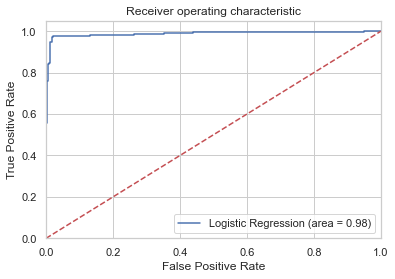

In [652]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sns.set(style="whitegrid", color_codes=True)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


# Deployement

In [654]:
data_final['Probability of Default'] = logreg.predict_proba(data_final[X_train.columns])[:,1]
data_final[['subject_id', 'Probability of Default']].head(10)

C:\Users\SHALIN~1\AppData\Local\Temp/ipykernel_29132/463671517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['Probability of Default'] = logreg.predict_proba(data_final[X_train.columns])[:,1]


,subject_id,Probability of Default
0,110113010000498773,0.813025
1,110115010001596750,0.172028
4,110114010000811717,0.178517
5,110113010000518471,0.142363
9,110113010000521093,0.114709
13,110115010001279211,0.317949
17,110116010001982650,0.411163
18,110117010002392740,0.663873
19,110116010001751305,0.378988
22,110113010000280978,1.000000


In [655]:
X_train.columns 

Index(['NUMBER_OF_INSTALLMENTS', 'SANCTION_AMT', 'OVER_DUE_AMT',
       'INSTALMENT_LOAN_TYPE_ConsumerLoan',
       'INSTALMENT_LOAN_TYPE_OtherInstalmentOperation',
       'loan_status_Existing'],
      dtype='object')

In [656]:
new_data = np.array([360,560000,56789,1,0,0]).reshape(1, -1)
new_prediction=logreg.predict_proba(new_data)[:,1][0]
print("This new loan applicant has a {:.3%}".format(new_prediction), "chance of defaulting on a new loan")

This new loan applicant has a 55.086% chance of defaulting on a new loan


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
